In [1]:
import math
import numpy as np
import networkx as nx
import pandas as pd
from collections import Counter
import operator

import config
from config import load_users_dataframe
from config import load_networkx_all
from config import load_networkx_friends
from config import load_networkx_potential

# Plotting
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Networkx
from networkx.drawing.nx_agraph import graphviz_layout
import dzcnapy_plotlib as dzcnapy

project_name = config.settings['data']['eventname']
timeframe = config.settings['timeframe']
save_to_file = config.settings['save_to_file'] == 'True'
window = 30
unique_users = load_users_dataframe()
network_all = load_networkx_all()
network_friends = load_networkx_friends()
network_potential = load_networkx_potential()

{'calculate': {'analysis': True,
               'friends': False,
               'network': True,
               'uniquetweets': True,
               'uniqueusers': True},
 'data': {'dates': ['2018-03-11', '2018-03-12', '2018-03-13'],
          'eventname': "Givenchy's Death",
          'phrases': ['givenchy%20death', 'givenchy%20passed%20away'],
          'starttime': 'Mar 12 08:20:00 -0500 2018'},
 'path': {'cwd': '/Users/lzhou/git/github/uclresearchanalysis/data/givenchy',
          'networkx': {'all': '/Users/lzhou/git/github/uclresearchanalysis/data/givenchy/pickle/networkx_all.dat',
                       'friends': '/Users/lzhou/git/github/uclresearchanalysis/data/givenchy/pickle/networkx_friends.dat',
                       'potential': '/Users/lzhou/git/github/uclresearchanalysis/data/givenchy/pickle/networkx_potential.dat'},
          'newcrawl': '/Users/lzhou/git/github/uclresearchanalysis/other/newcrawl.dat',
          'pickle': {'friends': '/Users/lzhou/git/github/uclresea

In [80]:
unique_users.head()

,user,user_id,time_lapsed,followers_count,friends_count,mention_and_reply,source_candidates,source_index,seed_index,generation,time_since_seed,exposed,pos_x,pos_y,pos
0,davelackie,100766356,0.00,143119,4643,[],"[3, 5, 6, 7, 10, 11, 14, 15, 19, 20, 24, 74, 8...",None,0,0,0,0.0,1,6,"(1, 6)"
1,alexanderskhan,3186545203,0.15,753,3428,[0],[0],0,0,1,0.15,0.0,2,5,"(2, 5)"
2,consiglierela,4134992843,0.23,2161,396,[0],"[0, 12, 21, 32, 48, 748, 819, 972, 2358, 2778,...",0,0,1,0.23,0.0,3,5,"(3, 5)"
3,ImpactPrincess,1955472014,0.63,242,642,[0],"[0, 115, 577]",0,0,1,0.63,0.0,4,5,"(4, 5)"
5,panagiota_karag,2938214163,1.18,250,493,[0],"[0, 20, 577, 1012, 1591, 1656, 1807, 1953, 320...",0,0,1,1.18,0.0,5,5,"(5, 5)"


Loading data file from path /Users/lzhou/git/github/uclresearchanalysis/data/givenchy/pickle/users.dat
'Loaded 5011 entires'


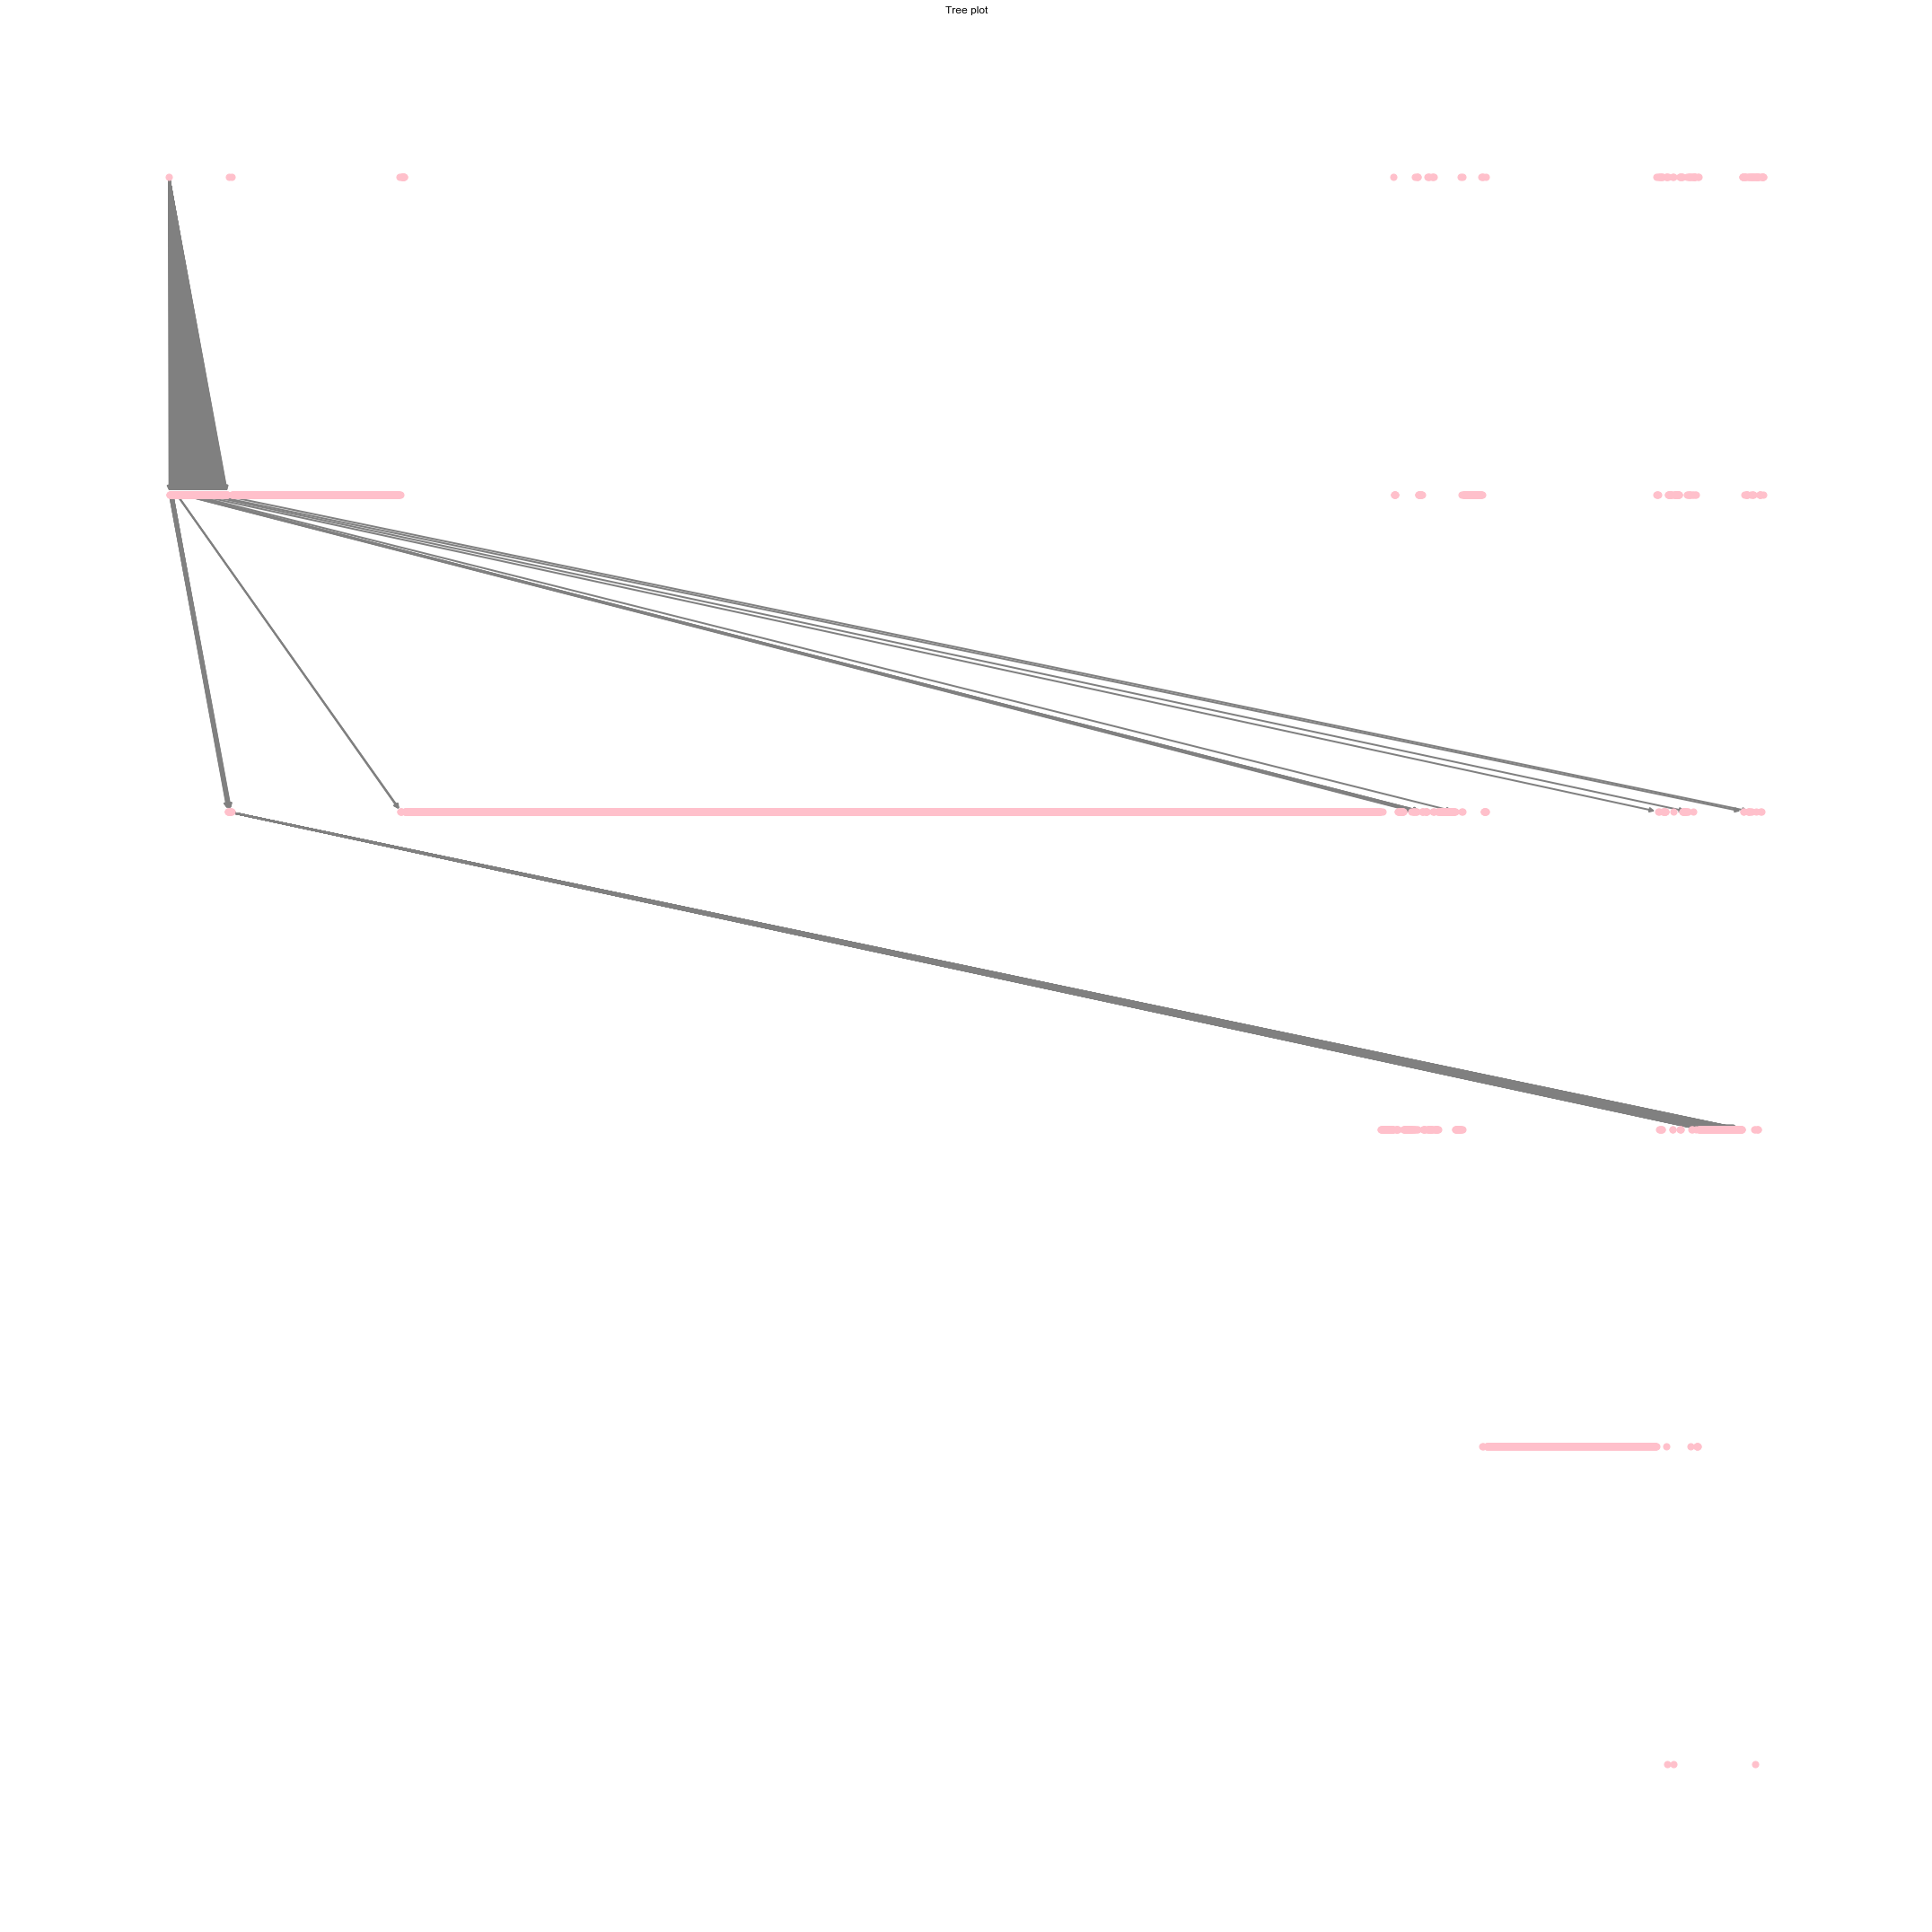

In [82]:
unique_users = load_users_dataframe()
unique_users = unique_users[0:5000]
for index, row in unique_users.iterrows():
    source_index = row['source_index']
    if source_index is None:
        unique_users.loc[index, 'exposed'] = row['time_lapsed']
    else:
        unique_users.loc[index, 'exposed'] = unique_users.loc[source_index, 'time_lapsed']


unique_users = unique_users.sort_values(by=['exposed', 'time_lapsed'])

max_generation = max(unique_users.generation)
unique_users['pos_x'] = range(1, len(unique_users) + 1)
unique_users['pos_y'] = np.add(max_generation + 1, -unique_users.generation)
unique_users['pos'] = list(zip(unique_users.pos_x, unique_users.pos_y))

DG=nx.DiGraph()
DG.add_nodes_from(unique_users.index)
previous_index = None
for index, row in unique_users.iterrows():
    if row['source_index'] is not None and row['seed_index'] == 0:
        previous_index = row['source_index']
        DG.add_edge(row['source_index'],index)
pos = {index: row['pos'] for index, row in unique_users.iterrows()}
attributes = dzcnapy.small_attrs.copy()
nx.draw_networkx(DG, pos=pos, with_labels=False, **attributes)
plt.axis('off')
dzcnapy.set_extent(pos, plt)
dzcnapy.plot('Tree plot', [30, 30], save=False)